## Health Survey Risk Factors
source: https://www.kaggle.com/datasets/lplenka/brfss-data

## pre-processing

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#from sklearn.decomposition import PCA
#from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [14]:
df=pd.read_csv('/Users/lingtianhan/Desktop/CMU/Fall 2022/38-615 ML/project/brfss2013.csv', encoding= 'unicode_escape', low_memory=False)

In [3]:
df.shape

(491775, 330)

In [31]:
# select columns with general health and other predictors
# unselected columns are not related
# response varibable is with index 18
df = df.iloc[:,18:]

- <0.1 : 339282 * 124 69% row remain
- <0.15 : 250425 * 135 49% row remain
- <0.2 : 209095 * 140 42% row remain

In [32]:
#check missing values
#drop coulmns: we set the missing rate to be lesser than 0.1
#drop rows: all rows contains missing values
mask=(df.isnull().sum()/df.shape[0])<0.1
features=df.columns[mask]
df1 = df[features]
df1.dropna(inplace=True)
df1.reset_index(drop=True,inplace=True)

/var/folders/tc/hjg8dsq54vzfrk5v6v96k32r0000gn/T/ipykernel_93962/1259639486.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.dropna(inplace=True)


%%%%%%%%%%%%%
start from here

In [33]:
#replace general health columns with numerical data
df1['genhlth'].replace(['Excellent','Very good','Good','Fair','Poor'],
                        [1,2,3,4,5], inplace=True)

/var/folders/tc/hjg8dsq54vzfrk5v6v96k32r0000gn/T/ipykernel_93962/2110561585.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['genhlth'].replace(['Excellent','Very good','Good','Fair','Poor'],


In [34]:
#replace other categocial data with numerical data
df_cat=df1.select_dtypes(include='object')
for i in range(df_cat.shape[1]):
    col_name=df_cat.columns[i]
    df_cat[col_name]=df_cat[col_name].astype('category').cat.codes

In [40]:
#find numerical data and merge cat & num together
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
df_num = df1.select_dtypes(include=numerics)
df_pre = df_num.join(df_cat)

In [20]:
df_pre

,genhlth,physhlth,menthlth,sleptim1,children,height3,alcday5,fruitju1,fruit1,fvbeans,...,X_veg23,X_fruitex,X_vegetex,X_totinda,X_pastrng,X_lmtact1,X_lmtwrk1,X_lmtscl1,X_rfseat2,X_rfseat3
0,3,0.0,0.0,6.0,2.0,510.0,0.0,305.0,301.0,310.0,...,0,1,0,0,0,0,0,0,0,0
1,3,3.0,2.0,9.0,0.0,504.0,220.0,301.0,203.0,202.0,...,0,1,0,1,0,1,1,1,0,0
2,2,2.0,0.0,8.0,0.0,504.0,208.0,202.0,306.0,202.0,...,0,1,0,0,0,0,0,0,0,0
3,3,10.0,2.0,6.0,0.0,600.0,210.0,0.0,302.0,101.0,...,0,1,0,1,0,0,0,0,0,0
4,2,0.0,0.0,8.0,0.0,503.0,0.0,205.0,206.0,0.0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339277,3,0.0,30.0,5.0,0.0,500.0,0.0,0.0,0.0,101.0,...,0,1,0,1,0,2,2,3,0,0
339278,3,1.0,3.0,6.0,1.0,510.0,204.0,320.0,308.0,205.0,...,0,1,0,0,0,0,0,0,0,0
339279,4,14.0,15.0,6.0,0.0,500.0,0.0,101.0,302.0,101.0,...,0,1,0,1,0,2,2,2,0,0
339280,4,15.0,20.0,7.0,3.0,505.0,0.0,102.0,103.0,0.0,...,0,1,0,0,0,0,0,0,0,0


## EDA

In [42]:
df_pre.to_csv('/Users/lingtianhan/Desktop/CMU/Fall 2022/38-615 ML/project/df_pre.csv')

In [12]:
df_pre = pd.read_csv('/Users/lingtianhan/Desktop/CMU/Fall 2022/38-615 ML/project/df_pre.csv',index_col=0)

In [14]:
df_pre.info()
df_pre.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 339282 entries, 0 to 339281
Columns: 124 entries, genhlth to X_rfseat3
dtypes: float64(39), int64(85)
memory usage: 323.6 MB


,genhlth,physhlth,menthlth,sleptim1,children,height3,alcday5,fruitju1,fruit1,fvbeans,...,X_veg23,X_fruitex,X_vegetex,X_totinda,X_pastrng,X_lmtact1,X_lmtwrk1,X_lmtscl1,X_rfseat2,X_rfseat3
count,339282.000000,339282.000000,339282.000000,339282.000000,339282.000000,339282.000000,339282.000000,339282.000000,339282.000000,339282.000000,...,339282.000000,339282.000000,339282.000000,339282.000000,339282.000000,339282.000000,339282.000000,339282.000000,339282.000000,339282.000000
mean,2.487423,3.966939,3.167896,7.045944,0.525168,518.484995,95.277206,134.837560,180.207742,212.278208,...,0.000103,0.999788,0.000103,0.251628,0.278771,0.495511,0.549189,0.766248,0.055332,0.132701
std,1.067659,8.403641,7.363573,1.394212,1.021836,37.083732,96.215606,125.669948,95.530028,109.461349,...,0.010156,0.014566,0.010156,0.433949,0.448395,0.768517,0.834012,1.202989,0.228627,0.339252
min,1.000000,0.000000,0.000000,1.000000,0.000000,300.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,6.000000,0.000000,504.000000,0.000000,0.000000,101.000000,201.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,0.000000,0.000000,7.000000,0.000000,507.000000,101.000000,101.000000,201.000000,204.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.000000,3.000000,2.000000,8.000000,1.000000,510.000000,202.000000,301.000000,302.000000,304.000000,...,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
max,5.000000,30.000000,30.000000,24.000000,17.000000,709.000000,230.000000,399.000000,399.000000,399.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,3.000000,1.000000,1.000000


In [40]:
#removed catagorical data: 'X_misfrtn','X_misvegn','X_frtresp','X_vegresp'
#only contain unique value

<AxesSubplot:>

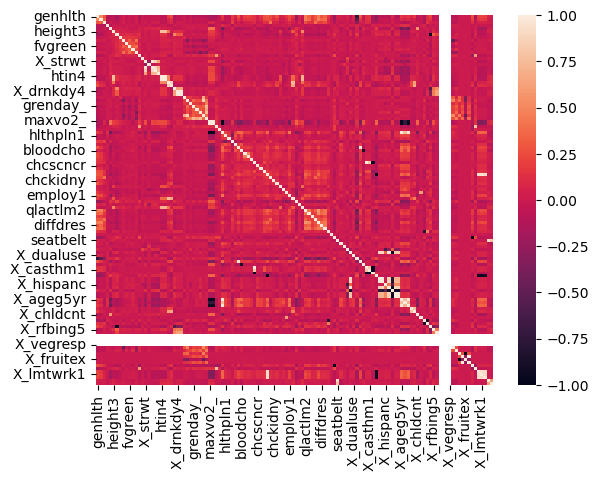

In [22]:
corr = df_pre.corr()
sns.heatmap(corr)

In [41]:
#corr[corr['genhlth']>0.2]

In [16]:
cor_matrix = df_pre.corr().abs()
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.99)]
#data_num = data_num.drop(to_drop, axis=1)
#has not drop yet

/var/folders/tc/hjg8dsq54vzfrk5v6v96k32r0000gn/T/ipykernel_95855/4226771934.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))


In [49]:
def remove_outliers(df,columns,n_std):
    for col in columns:

        mean = df[col].mean()
        sd = df[col].std()
        
        df = df[(df[col] <= mean+(n_std*sd))]
        
    return df

#remove the outliers, set to 7*std
df_pre_remove_outliers = remove_outliers(df_pre,df_pre.columns,7)
df_pre_remove_outliers.shape

(329831, 124)

In [50]:
df_try1 = df_pre_remove_outliers.drop(columns=['X_misfrtn','X_misvegn','X_frtresp','X_vegresp'])

The data contains 339282 rows and 124 columns (1 response variable & 123 features)
- 39 numerical columns
- 36 YES/NO columns
- 48 others

## Model

In [43]:
df_pre.iloc[:,1:]

,physhlth,menthlth,sleptim1,children,height3,alcday5,fruitju1,fruit1,fvbeans,fvgreen,...,X_veg23,X_fruitex,X_vegetex,X_totinda,X_pastrng,X_lmtact1,X_lmtwrk1,X_lmtscl1,X_rfseat2,X_rfseat3
0,0.0,0.0,6.0,2.0,510.0,0.0,305.0,301.0,310.0,203.0,...,0,1,0,0,0,0,0,0,0,0
1,3.0,2.0,9.0,0.0,504.0,220.0,301.0,203.0,202.0,202.0,...,0,1,0,1,0,1,1,1,0,0
2,2.0,0.0,8.0,0.0,504.0,208.0,202.0,306.0,202.0,310.0,...,0,1,0,0,0,0,0,0,0,0
3,10.0,2.0,6.0,0.0,600.0,210.0,0.0,302.0,101.0,310.0,...,0,1,0,1,0,0,0,0,0,0
4,0.0,0.0,8.0,0.0,503.0,0.0,205.0,206.0,0.0,203.0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339277,0.0,30.0,5.0,0.0,500.0,0.0,0.0,0.0,101.0,203.0,...,0,1,0,1,0,2,2,3,0,0
339278,1.0,3.0,6.0,1.0,510.0,204.0,320.0,308.0,205.0,315.0,...,0,1,0,0,0,0,0,0,0,0
339279,14.0,15.0,6.0,0.0,500.0,0.0,101.0,302.0,101.0,101.0,...,0,1,0,1,0,2,2,2,0,0
339280,15.0,20.0,7.0,3.0,505.0,0.0,102.0,103.0,0.0,304.0,...,0,1,0,0,0,0,0,0,0,0


- try without removing outlier

In [44]:
train_Y = df_pre.iloc[:,0]
train_X = df_pre.iloc[:,1:]

In [45]:
x_train, x_test, y_train, y_test = train_test_split(train_X, train_Y, random_state= 123)

In [46]:
import warnings
warnings.filterwarnings('ignore')

In [48]:
scaler = StandardScaler()
scaler.fit(x_train)

scaled_x_train = scaler.transform(x_train)
scaled_x_test = scaler.transform(x_test)
model_Log = LogisticRegression().fit(scaled_x_train, y_train)
y_pred_Log = model_Log.predict(scaled_x_test)
print(classification_report(y_test,y_pred_Log))
print('The accuracy score is',accuracy_score(y_test,y_pred_Log))

              precision    recall  f1-score   support

           1       0.52      0.28      0.36     15733
           2       0.49      0.68      0.57     29675
           3       0.63      0.53      0.57     25370
           4       0.83      0.90      0.86     10128
           5       0.66      0.51      0.57      3915

    accuracy                           0.58     84821
   macro avg       0.63      0.58      0.59     84821
weighted avg       0.59      0.58      0.57     84821

The accuracy score is 0.5790665047570767


- try after remove outlier

In [52]:
train_y = df_try1.iloc[:,0]
train_x = df_try1.iloc[:,1:]
X_train, X_test, Y_train, Y_test = train_test_split(train_x, train_y, random_state= 123)

In [53]:
#standarlize the data and do a logistic regression, we get accuracy score: 0.58
scaler = StandardScaler()
scaler.fit(X_train)

scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)
model_Log = LogisticRegression().fit(scaled_X_train, Y_train)
Y_pred_Log = model_Log.predict(scaled_X_test)
print(classification_report(Y_test,Y_pred_Log))
print('The accuracy score is',accuracy_score(Y_test,Y_pred_Log))

              precision    recall  f1-score   support

           1       0.52      0.28      0.36     15311
           2       0.50      0.68      0.58     29300
           3       0.62      0.53      0.57     24341
           4       0.83      0.89      0.86      9848
           5       0.64      0.52      0.57      3658

    accuracy                           0.58     82458
   macro avg       0.62      0.58      0.59     82458
weighted avg       0.59      0.58      0.57     82458

The accuracy score is 0.5801984040359941


- using decision tree

In [69]:
def train_using_gini(X_train, X_test, y_train):
  
    # Creating the classifier object
    clf_gini = DecisionTreeClassifier(criterion = "gini",
            random_state = 100,max_depth=10, min_samples_leaf=10)
  
    # Performing training
    clf_gini.fit(X_train, y_train)
    return clf_gini
      
# Function to perform training with entropy.
def tarin_using_entropy(X_train, X_test, y_train):
  
    # Decision tree with entropy
    clf_entropy = DecisionTreeClassifier(
            criterion = "entropy", random_state = 100,
            max_depth = 10, min_samples_leaf = 10)
  
    # Performing training
    clf_entropy.fit(X_train, y_train)
    return clf_entropy

# Function to make predictions
def prediction(X_test, clf_object):
  
    # Predicton on test with giniIndex
    y_pred = clf_object.predict(X_test)
    print("Predicted values:")
    print(y_pred)
    return y_pred
      
# Function to calculate accuracy
def cal_accuracy(y_test, y_pred):
      
    print("Confusion Matrix: ",
        confusion_matrix(y_test, y_pred))
      
    print ("Accuracy : ",
    accuracy_score(y_test,y_pred))
      
    print("Report : ",
    classification_report(y_test, y_pred))

In [70]:
clf_gini = train_using_gini(x_train, x_test, y_train)
y_pred_gini = prediction(x_test, clf_gini)
cal_accuracy(y_test, y_pred_gini)

Predicted values:
[2 3 2 ... 2 1 2]
Confusion Matrix:  [[ 2963 11015  1755     0     0]
 [ 2055 20547  7073     0     0]
 [  555 12015 12800     0     0]
 [    0     0     0  8721  1407]
 [    0     0     0  1882  2033]]
Accuracy :  0.5548625929899436
Report :                precision    recall  f1-score   support

           1       0.53      0.19      0.28     15733
           2       0.47      0.69      0.56     29675
           3       0.59      0.50      0.54     25370
           4       0.82      0.86      0.84     10128
           5       0.59      0.52      0.55      3915

    accuracy                           0.55     84821
   macro avg       0.60      0.55      0.56     84821
weighted avg       0.57      0.55      0.54     84821



In [71]:
clf_entropy = tarin_using_entropy(x_train, x_test, y_train)
y_pred_entropy = prediction(x_test, clf_entropy)
cal_accuracy(y_test, y_pred_entropy)

Predicted values:
[2 2 2 ... 2 1 2]
Confusion Matrix:  [[ 3706 10151  1876     0     0]
 [ 2830 19136  7709     0     0]
 [  749 11114 13507     0     0]
 [    0     0     0  8801  1327]
 [    0     0     0  1900  2015]]
Accuracy :  0.5560533358484337
Report :                precision    recall  f1-score   support

           1       0.51      0.24      0.32     15733
           2       0.47      0.64      0.55     29675
           3       0.58      0.53      0.56     25370
           4       0.82      0.87      0.85     10128
           5       0.60      0.51      0.56      3915

    accuracy                           0.56     84821
   macro avg       0.60      0.56      0.57     84821
weighted avg       0.56      0.56      0.54     84821

